# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import scipy.stats as st


# Import datetime in order to label plots 
import datetime
d = datetime.datetime.today()
date = f'{d.month}-{d.day}-{d.year}'

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
count = len(cities)
#print(f"The latitude information received is: {lats}")
#print(f"The longitude information received is: {lngs}")
print(f"The no. of random cities: {count}")
#print(f"The no. of cities: {cities}")


The no. of random cities: 625


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [15]:
# set up lists to hold reponse info
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []
lat = []
lng = []

city_list = []

counter = 0

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each
print(f"Beginning Data Retrieval")
print(f"--------------------------------")
for city in cities:
    response = requests.get(query_url + city).json()
    
    try: 
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        city_list.append(city)
        counter += 1    
        print(f"Processing Record {counter} | {city}")
        
    # Handle exceptions for cities not found
    except:
        print("City not found. Skipping...")
        pass
print('-----------------------------')
print('Data Retrieval Complete')    
print('-----------------------------')

    

Beginning Data Retrieval
--------------------------------
Processing Record 1 | rikitea
Processing Record 2 | ushuaia
Processing Record 3 | albany
Processing Record 4 | castro
Processing Record 5 | kapaa
Processing Record 6 | carnarvon
Processing Record 7 | vao
City not found. Skipping...
City not found. Skipping...
Processing Record 8 | sur
Processing Record 9 | tura
Processing Record 10 | zaltan
Processing Record 11 | kruisfontein
Processing Record 12 | hermanus
City not found. Skipping...
Processing Record 13 | chuy
Processing Record 14 | vaini
Processing Record 15 | butaritari
Processing Record 16 | ulladulla
Processing Record 17 | port alfred
Processing Record 18 | sao filipe
City not found. Skipping...
Processing Record 19 | olafsvik
Processing Record 20 | formosa
Processing Record 21 | punta arenas
City not found. Skipping...
Processing Record 22 | todos santos
City not found. Skipping...
Processing Record 23 | tuktoyaktuk
City not found. Skipping...
Processing Record 24 | james

Processing Record 228 | wilson
Processing Record 229 | leningradskiy
Processing Record 230 | cravo norte
City not found. Skipping...
Processing Record 231 | sestri levante
Processing Record 232 | ballina
Processing Record 233 | norman wells
Processing Record 234 | muisne
Processing Record 235 | kimbe
Processing Record 236 | vila
Processing Record 237 | broome
Processing Record 238 | narasannapeta
Processing Record 239 | margherita di savoia
Processing Record 240 | makakilo city
Processing Record 241 | sao joao da barra
Processing Record 242 | johi
Processing Record 243 | sioux lookout
City not found. Skipping...
City not found. Skipping...
Processing Record 244 | macheng
City not found. Skipping...
Processing Record 245 | chernyshevskiy
Processing Record 246 | biak
Processing Record 247 | mahebourg
Processing Record 248 | riyadh
Processing Record 249 | ruwi
Processing Record 250 | la orilla
Processing Record 251 | kloulklubed
Processing Record 252 | nioro
Processing Record 253 | dali
P

Processing Record 460 | nanakuli
Processing Record 461 | aasiaat
Processing Record 462 | adrar
Processing Record 463 | port hedland
Processing Record 464 | gizo
City not found. Skipping...
Processing Record 465 | lompoc
Processing Record 466 | aksay
Processing Record 467 | anori
Processing Record 468 | peleduy
Processing Record 469 | westport
Processing Record 470 | coruripe
Processing Record 471 | nusaybin
Processing Record 472 | gisborne
Processing Record 473 | manbij
Processing Record 474 | leo
Processing Record 475 | abu samrah
Processing Record 476 | havre-saint-pierre
Processing Record 477 | martapura
Processing Record 478 | lampazos de naranjo
Processing Record 479 | tabanan
Processing Record 480 | dingle
Processing Record 481 | kirakira
Processing Record 482 | mogadishu
Processing Record 483 | chapada dos guimaraes
Processing Record 484 | chara
Processing Record 485 | katsuura
Processing Record 486 | gazojak
Processing Record 487 | flinders
Processing Record 488 | kotel
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
# create a data frame from cities, lat, and temp
city_dict = {
    "City": city_list,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": Max_Temp,
    "Humidity": Humidity,
    "Cloudiness": Cloudiness,
    "Wind Speed": Wind_Speed,
    "Country": Country,
    "Date": Date
}
city_data = pd.DataFrame(city_dict)
city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,79.20,73,97,10.67,PF,1644103722
1,ushuaia,-54.8000,-68.3000,53.26,58,20,29.93,AR,1644103813
2,albany,42.6001,-73.9662,15.10,57,5,1.01,US,1644103842
3,castro,-24.7911,-50.0119,65.25,97,79,1.92,BR,1644104043
4,kapaa,22.0752,-159.3190,80.19,64,0,3.00,US,1644103971
...,...,...,...,...,...,...,...,...,...
572,arman,59.7000,150.1667,2.01,72,32,11.52,RU,1644104211
573,shenjiamen,29.9576,122.2980,40.46,62,55,9.53,CN,1644104212
574,the valley,18.2170,-63.0578,76.10,94,75,9.22,AI,1644104212
575,potsdam,52.3989,13.0657,43.09,83,100,5.99,DE,1644104212


In [32]:
# Export the city data into a .csv file.
city_data.to_csv("./output_data/city_data.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [42]:
outliers_df = city_data.loc[city_data["Humidity"] > 100]
outliers_df.head()
# no cities have humidity > 100%

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

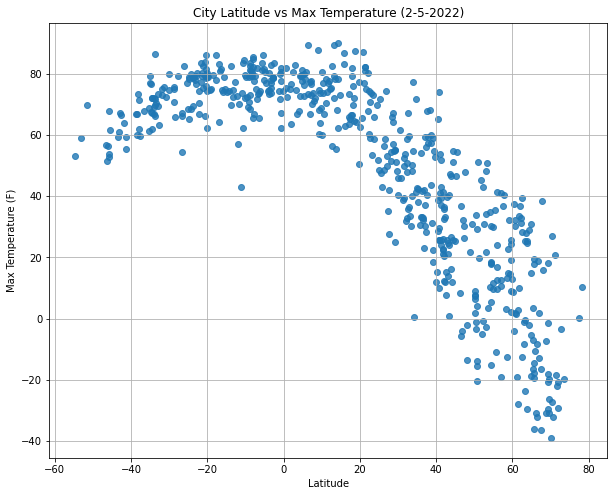

In [72]:
# Create a scatter plot for latitude vs max temperature.
x_values = city_data['Lat']
y_values = city_data['Max Temp']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Max Temperature ({date})")
plt.grid()
plt.savefig("./Images/latitude_vs_temperature.png")
plt.show()

#add a sentence or two explaining what the code is analyzing
#1. the code showcase the relationship between Latitude and Max. Temperature using our created dataframe.
#2. the plot shows that the temperature increases when Latitude reaches to 0 which is the equator



## Latitude vs. Humidity Plot

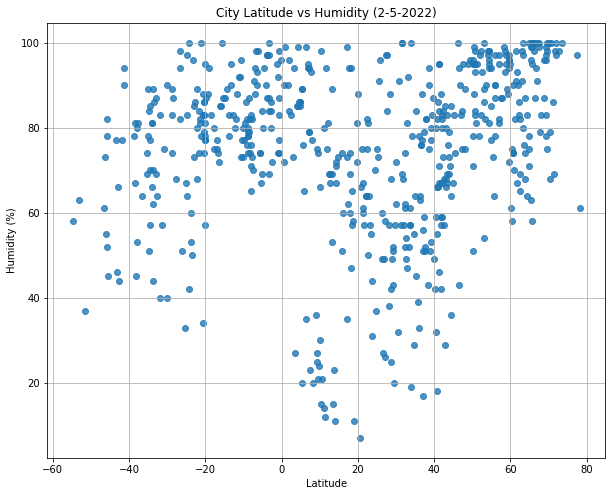

In [73]:
# Create a scatter plot for latitude vs Humidity.
x_values = city_data['Lat']
y_values = city_data['Humidity']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs Humidity ({date})")
plt.grid()
plt.savefig("./Images/latitude_vs_Humidity.png")
plt.show()

#add a sentence or two explaining what the code is analyzing.
 #1. the code showcase the relationship between Latitude and Humidity using our created dataframe.
 #2. the plot shows that the humidy decreases rapidly between 0 to 40 latitude


## Latitude vs. Cloudiness Plot

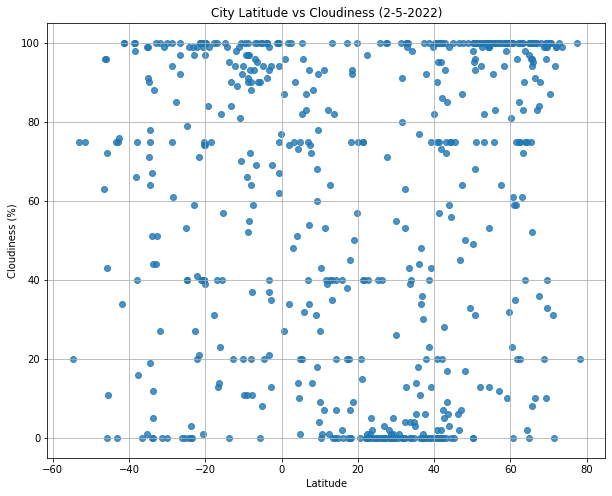

In [74]:
# Create a scatter plot for latitude vs Cloudiness.
x_values = city_data['Lat']
y_values = city_data['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs Cloudiness ({date})")
plt.grid()
plt.savefig("./Images/latitude_vs_Cloudiness.png")
plt.show()

#add a sentence or two explaining what the code is analyzing.
# 1. the code showcase the relationship between Latitude and Cloudiness using our created dataframe.
# 2. the plot shows that the humidity and latitude relationship is very scattered

## Latitude vs. Wind Speed Plot

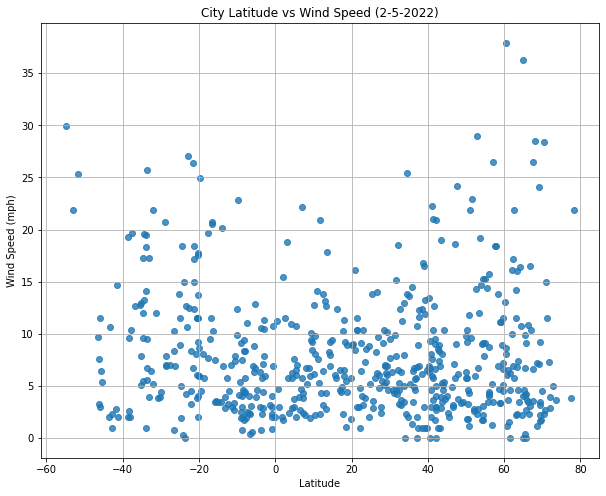

In [75]:
# Create a scatter plot for latitude vs Wind Speed.
x_values = city_data['Lat']
y_values = city_data['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.grid()
plt.savefig("./Images/latitude_vs_Wind Speed.png")
plt.show()

#add a sentence or two explaining what the code is analyzing.
# 1. the code showcase the relationship between Latitude and Wind Speed using our created dataframe.
# 2. the plot shows that the wind speed majorly stays below 15 around all latitude data.

## Linear Regression

In [43]:
def regressplot(x, y):
    
    # Calculate the correlation coefficient 
    correlation = st.pearsonr(x,y)

    # Print the answer to above calculation, but squared
    print(f"""The r-squared value is {round((correlation[0]**2),2)}""")

    # Calculate linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot linear regression on top of scatter plot
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    return line_eq

In [45]:
# Create Northern and Southern Hemisphere DataFrames
north_df = city_data.loc[city_data['Lat'] >= 0]
south_df = city_data.loc[city_data['Lat'] < 0]
north_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,albany,42.6001,-73.9662,15.10,57,5,1.01,US,1644103842
4,kapaa,22.0752,-159.3190,80.19,64,0,3.00,US,1644103971
7,sur,22.5667,59.5289,70.61,50,0,6.44,OM,1644104045
8,tura,25.5198,90.2201,47.64,91,0,2.84,IN,1644104045
9,zaltan,32.9470,11.8665,59.68,47,99,3.65,LY,1644104045


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.73


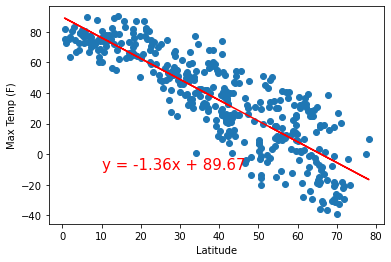

In [48]:
#calling fxn
line_eq = regressplot(x = north_df['Lat'], y = north_df['Max Temp'])

# Annotate linear regression
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.savefig('./Images/North_Temp.png')

plt.show()

#explain what the linear regression is modeling. 
#For example, describe any relationships you notice and any other analysis you may have.
#1. The plot shows the regression model between max. temp. and laitude for Northern Hemishphere cities.
#2. The linear regression shows negative correlation meaning when we go further away from equator the temp. will decrease.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.28


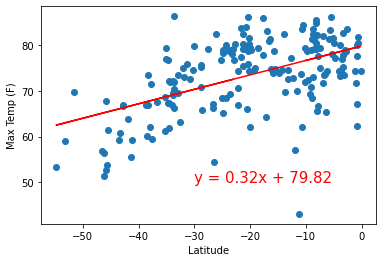

In [50]:
#calling fxn
line_eq = regressplot(x = south_df['Lat'], y = south_df['Max Temp'])

# Annotate linear regression
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.savefig('./Images/South_Temp.png')

plt.show()

#explain what the linear regression is modeling. 
#For example, describe any relationships you notice and any other analysis you may have.
#1. The plot shows the regression model between max. temp. and laitude for Southern Hemishphere cities.
#2. The linear regression shows little correlation meaning temp. increases when latitude reaches to 0.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.17


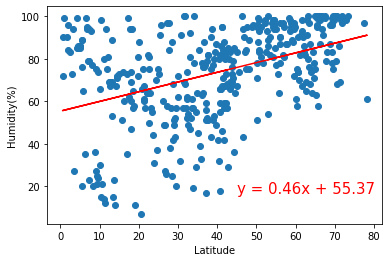

In [52]:
#calling fxn
line_eq = regressplot(x = north_df['Lat'], y = north_df['Humidity'])

# Annotate linear regression
plt.annotate(line_eq,(45,17),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

plt.savefig('./Images/North_Humidity.png')

plt.show()
#explain what the linear regression is modeling. 
#For example, describe any relationships you notice and any other analysis you may have.
#1. The plot shows the regression model between Humidity and latitude for Northern Hemishphere cities.
#2. The linear regression is not high enough to make any conclusions

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.2


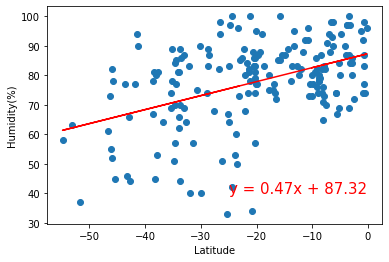

In [53]:
#calling fxn
line_eq = regressplot(x = south_df['Lat'], y = south_df['Humidity'])

# Annotate linear regression
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

plt.savefig('./Images/South_Humidity.png')

plt.show()
#explain what the linear regression is modeling. 
#For example, describe any relationships you notice and any other analysis you may have.
#1. The plot shows the regression model between Humidity and latitude for Southern Hemishphere cities.
#2. The linear regression is not high enough to make any conclusions

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.11


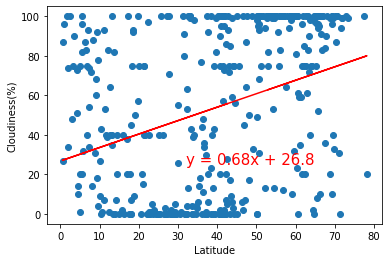

In [54]:
#calling fxn
line_eq = regressplot(x = north_df['Lat'], y = north_df['Cloudiness'])

# Annotate linear regression
plt.annotate(line_eq,(32,25),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

plt.savefig('./Images/North_Cloudiness.png')

plt.show()

#explain what the linear regression is modeling. 
#For example, describe any relationships you notice and any other analysis you may have.
#1. The plot shows the regression model between Cloudiness and latitude for Northern Hemishphere cities.
#2. The linear regression is not high enough to make any conclusions

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.03


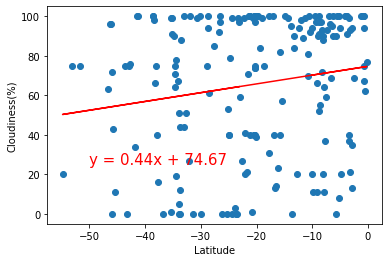

In [55]:
#calling fxn
line_eq = regressplot(x = south_df['Lat'], y = south_df['Cloudiness'])

# Annotate linear regression
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

plt.savefig('./Images/South_Cloudiness.png')

plt.show()
#explain what the linear regression is modeling. 
#For example, describe any relationships you notice and any other analysis you may have.
#1. The plot shows the regression model between Cloudiness and latitude for Southern Hemishphere cities.
#2. The linear regression is not high enough to make any conclusions

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.01


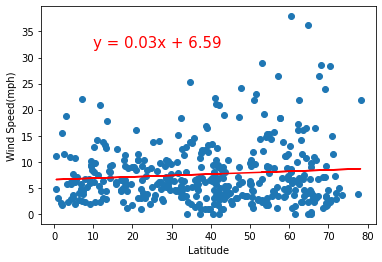

In [56]:
#calling fxn
line_eq = regressplot(x = north_df['Lat'], y = north_df['Wind Speed'])

# Annotate linear regression
plt.annotate(line_eq,(10,32),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

plt.savefig('./Images/North_Wind_Speed.png')

plt.show()
#explain what the linear regression is modeling. 
#For example, describe any relationships you notice and any other analysis you may have.
#1. The plot shows the regression model between Wind Speed and latitude for Northern Hemishphere cities.
#2. The linear regression is not high enough to make any conclusions

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.1


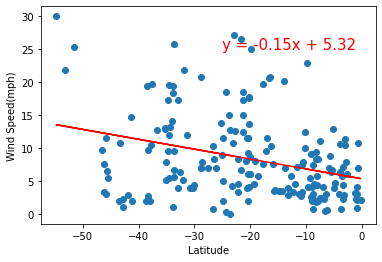

In [57]:
#calling fxn
line_eq = regressplot(x = south_df['Lat'], y = south_df['Wind Speed'])

# Annotate linear regression
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

plt.savefig('./Images/South_Wind_Speed.png')

plt.show()
#explain what the linear regression is modeling. 
#For example, describe any relationships you notice and any other analysis you may have.
#1. The plot shows the regression model between Wind Speed and latitude for Southern Hemishphere cities.
#2. The linear regression is not high enough to make any conclusions